# *K*-means: the first approach to unsupervised learning

In this notebook we are going to leave behind the world of supervised learning and dive into the fascinating (and much more complex!) unsupervised domain.

## Unsupervised learning

As the name suggests, a problem is unsupervised when our dataset is not labeled. Thus we cannot learn from a pre-existing outcome as the data points we have in hand are not directly linked to any specific predictable attribute. So, to be clearer, a typical supervised problem would come in the form of a matrix $\textbf{X} \in \mathcal{R}^{N \times d}$ (*N* data points, *d* features) and a dependent variable $\textbf{y} \in \mathcal{R}^{N \times 1}$ containing the piece of information we want our model to learn. On the contrary, in the unsupervised domain we are provided just with $\textbf{X}$. Nothing more.

What would we want to learn from data inputs which are not differentiable in the first place?

Actually, the whole point is exactly in this question. As the inputs are not labeled and hence not differentiable we may want to differentiate them. The idea is therefore to find patterns in the data with the aim to split it into "groups of interest".

## *K*-means

There are many available approaches to perform clustering. We are going to keep it simple and touch base on maybe the most well known strategy: *K-means clustering*. 

**K-means**  is a very intuitive way of splitting a data set into *K* distinct, non-overlapping clusters.

#### Algorithm

Here are the K-means algorithm step by step:

1. Randomly select K observations. These will be the centers (centroids) of our first clusters.
2. Calculate the data points closest (minimal square of Euclidean distance) to the *K* centroids defined above and assign each of them to one cluster. 
3. For every single cluster, calculate a new centroid, averaging the position of all the points assigned to the cluster itself.
4. Iterate over 2 and 3 until the centroids don't move anymore which means that each observation has been assigned to the cluster within which the variation is minimal. 


## Implementing K-means

As always, we are going to implement the algorithm **from scratch** and afterwards we will apply it to some dummy example.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
import scipy.io as sio
import random

### Functions

The following are the functions that implement the algorithm described earlier along with some util functions for plotting the result.

In [169]:
def findClosestCentroids(X, centroids):
    idx = np.zeros((X.shape[0], 1))
    for p in range(X.shape[0]):
        idx[p] = np.argmin(np.linalg.norm(X[p, :] - centroids, axis=1))
    return idx

def computeCentroids(X, idx, K): 
    centroids = np.zeros((K, X.shape[1]))
    for i in range(K):
        centroids[i, :] = np.mean(X[(idx == (i)).nonzero()[0], :], axis=0)
    return centroids

def kMeansInitCentroids(X, K):
    '''label_to_search = 0
    custom_centroids = np.zeros((K, X.shape[1]))
    for i in range(X_label.shape[0]):
        if label_to_search == 5:
            break
        if X_label[i] == label_to_search:
            custom_centroids[label_to_search, :] = X[i, :]
            label_to_search += 1
    return custom_centroids'''
    X = np.random.permutation(X)
    return X[:K, :]



       
def runkMeans(X, initial_centroids, max_iters):
    m = X.shape[0]
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    idx = np.zeros((m, 1))
    for i in range(max_iters):
        idx = findClosestCentroids(X, centroids)       
        centroids = computeCentroids(X, idx, K)
    return centroids, idx

In [170]:
data = sio.loadmat('ex7data2.mat')
X = data['X']
K = 3
max_iters = 100
initial_centroids = kMeansInitCentroids(X, K)
centroids, idx = runkMeans(X, initial_centroids, max_iters)

In [171]:
data = sio.loadmat('ex7data2.mat')
X = data['X']
X_label = np.hstack((X, idx))

In [172]:
def findClosestCentroids(X, centroids):
    idx = np.zeros((X.shape[0], 1))
    for p in range(X.shape[0]):
        idx[p] = np.argmin(np.linalg.norm(X[p, :] - centroids, axis=1))
    return idx

def computeCentroids(X, idx, K): 
    centroids = np.zeros((K, X.shape[1]))
    for i in range(K):
        centroids[i, :] = np.mean(X[(idx == (i)).nonzero()[0], :], axis=0)
    return centroids

def kMeansInitCentroids(X_label, X, K):
    label_to_search = 0
    custom_centroids = np.zeros((K, X.shape[1]))
    for i in range(X_label.shape[0]):
        if label_to_search == 3:
            break
        if X_label[i] == label_to_search:
            custom_centroids[label_to_search, :] = X[i, :]
            label_to_search += 1
    return custom_centroids
    


def runkMeans(X, initial_centroids, max_iters):
    m = X.shape[0]
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    idx = np.zeros((m, 1))
    for i in range(max_iters):
        idx = findClosestCentroids(X, centroids)       
        centroids = computeCentroids(X, idx, K)
    return centroids, idx

In [173]:
K = 3
max_iters = 30
initial_centroids = kMeansInitCentroids(X_label[:, 2], X, K)
centroids, idx2 = runkMeans(X, initial_centroids, max_iters)

In [174]:
from sklearn.metrics import accuracy_score
accuracy_score(idx, idx2)

1.0

It can be seen that the implementation of our algorithm performs pretty well on this dataset. <br>
In this case, it can be clearly seen that there are three different clusters. This is why I have selected upfront the number of clusters I wanted to group. <br>
But what if my dataset has a number of features (thus, the dimension of the dataset) $>4$? In that case I cannot plot the dataset and therefore I cannot choose upfront the number of clusters. There are different methods to counter this problem and we going to explain one in a moment.

### Image compression with *K*-means

It turns out that we cann apply K-means to **image compression**. In a straightforward 24-bit color representation of an image, 1 each pixel is represented as three 8-bit unsigned integers (ranging from 0 to 255) that specify the red, green and blue intensity values. This encoding is often refered to as the RGB encoding. Our image contains thousands of colors, and in this part of the exercise, we will reduce the number of colors to 16 colors.

By making this reduction, it is possible to represent (compress) the photo in an efficient way. Specifically, we only need to store the RGB values of the 16 selected colors, and for each pixel in the image we now need to only store the index of the color at that location (where only 4 bits are necessary to represent 16 possibilities).

We will use the K-means algorithm to select the 16 colors that will be used to represent the compressed image. Concretely, we will treat every pixel in the original image as a data example and use the K-means algorithm to find the 16 colors that best group (cluster) the pixels in the 3-dimensional RGB space. Once we have computed the cluster centroids on the image, we will then use the 16 colors to replace the pixels in the original image.

The following is the picture we are going to compress.

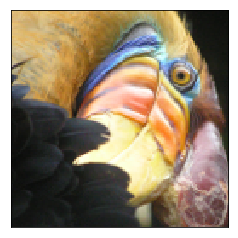

In [22]:
from skimage import io

bird = io.imread('bird_small.png')

plt.imshow(bird)
plt.xticks(())
plt.yticks(())
plt.show()

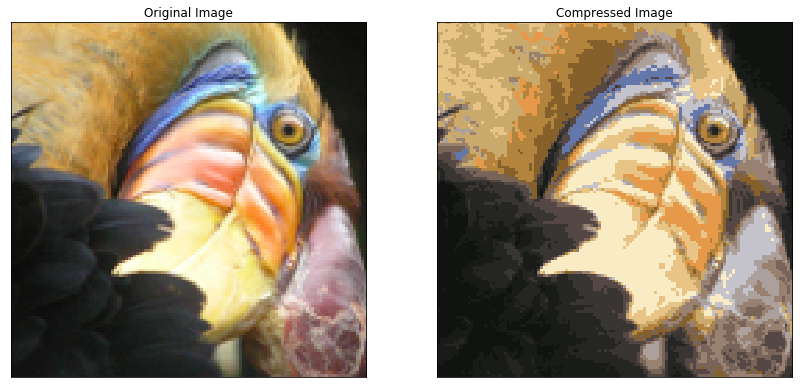

In [23]:
# Divide by 255 so that all values are in the range 0 - 1
bird = bird / 255
img_size = bird.shape

# Reshape the image into an Nx3 matrix where N = number of pixels.
# Each row will contain the Red, Green and Blue pixel values
# This gives us our dataset matrix X that we will use K-Means on
X = bird.reshape((img_size[0] * img_size[1], img_size[2]))
K = 16
max_iters = 12

# When using K-Means, it is important the initialize the centroids randomly
initial_centroids = kMeansInitCentroids(X, K)

# running K-means
centroids, idx = runkMeans(X, initial_centroids, max_iters,plot_clusters_and_centroids=False)

bird_compressed = np.zeros((X.shape[0], X.shape[1]))

# We can now recover the image from the indices (idx) by mapping each pixel
# (specified by it's index in idx) to the centroid value
for i, cluster in enumerate(idx):
    bird_compressed[i,:] = centroids[int(cluster[0]) - 1,:]

# Reshape the recovered image into proper dimensions
bird_compressed = bird_compressed.reshape((img_size[0], img_size[1], img_size[2]))

fig = plt.figure(figsize=(14, 8))

ax1 = fig.add_subplot(121)
ax1.imshow(bird)
ax1.set_title('Original Image')
plt.xticks(())
plt.yticks(())

ax2 = fig.add_subplot(122)
ax2.imshow(bird_compressed)
ax2.set_title('Compressed Image')
plt.xticks(())
plt.yticks(())

plt.show()

As it can be seen, the compressed image has a **much lower resolution** than the original one. <br>
This is due to the fact that we are just using 16 colors to represent our exotic bird!

## How to choose the good number of clusters

As mentioned before, a **drawback** of K-means is that we need to choose the number of clusters upfront, which is clearly not ideal. This means we need to have a deep understanding of the problem we want to solve before putting our hands on it, just to be able to formulate a logical hipothesys around an appropriate number of clusters. <br> We are going to explain a popular method that tries to solve this proble called **elbow method**.

### Elbow method

Elbow method give us an idea on what a good K number of clusters would be based on the sum of squared distance (SSE) between data points and their assigned clusters’ centroids. We pick K at the spot where SSE starts to flatten out and forming an elbow. We’ll use the previous dummy dataset and evaluate SSE for different values of K and see where the curve might form an elbow and flatten out.

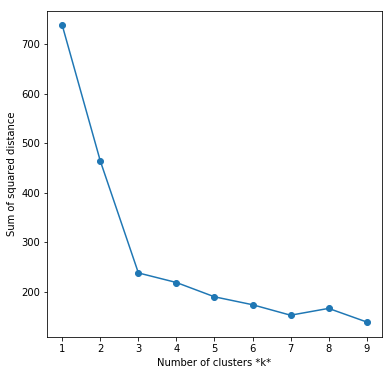

In [16]:
data = sio.loadmat('ex7data2.mat')
X = data['X']

sse = []
list_k = list(range(1, 10))
for K in list_k:   
    max_iters = 10
    initial_centroids = kMeansInitCentroids(X, K)
    centroids, idx = runkMeans(X, initial_centroids, max_iters, plot_clusters_and_centroids=False)

    sse_sum = 0
    for ki in range(1, K + 1):
        sse_sum += sum(np.linalg.norm(X[(idx == (ki)).nonzero()[0], :] - centroids[ki - 1], axis=1))
    sse.append(sse_sum)
# Plot sse against k
plt.figure(figsize=(6, 6));
plt.plot(list_k, sse, '-o');
plt.xlabel(r'Number of clusters *k*');
plt.ylabel('Sum of squared distance');
    

The graph above shows that K=3 is not a bad choice since SSE starts to flatten out and forming an elbow from that point onwards. <br>
Sometimes it’s still hard to figure out a good number of clusters to use because the curve is monotonically decreasing and may not show any elbow or has an obvious point where the curve starts flattening out.

## Compare to sklearn implementation

In order to test whether our implementation is correct, I usually compare my implementation to **sklearn implementation**.

In [18]:
from sklearn.cluster import KMeans
data = sio.loadmat('ex7data2.mat')
X = data['X']
K = 3
kmeans = KMeans(n_clusters=K, random_state=0).fit(X)

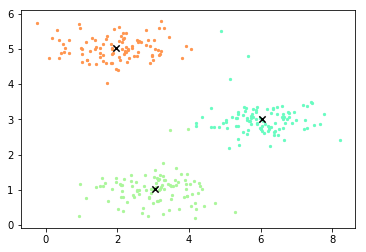

In [20]:
plotDataPoints(X, kmeans.labels_ + 1, K)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], linewidths=3, s = 40, c = 'black', marker='x');

It can be seen that sklearn clusters the data points **exactly** as my implementation did. I am over the moon!